In [1]:
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# ML tools
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.pipeline import Pipeline

# Models
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

# Evaluation
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

sns.set(style="whitegrid")


In [2]:
df = pd.read_csv("ObesityDataSet_raw_and_data_sinthetic.csv")

print("Dataset Shape:", df.shape)
df.head()


Dataset Shape: (2111, 17)


,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


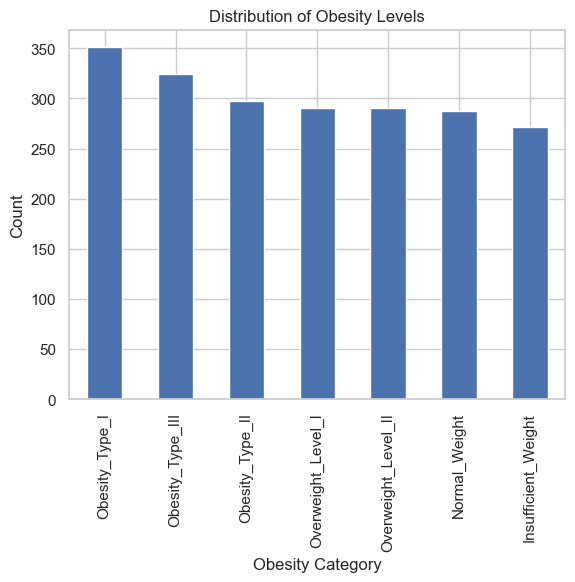

In [3]:
df["NObeyesdad"].value_counts().plot(
    kind="bar",
    title="Distribution of Obesity Levels"
)
plt.xlabel("Obesity Category")
plt.ylabel("Count")
plt.show()


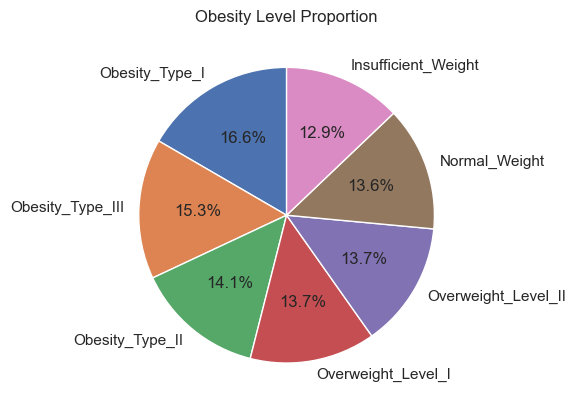

In [4]:
df["NObeyesdad"].value_counts().plot(
    kind="pie",
    autopct="%1.1f%%",
    startangle=90
)
plt.title("Obesity Level Proportion")
plt.ylabel("")
plt.show()


In [5]:
label_encoders = {}

for col in df.select_dtypes(include="object").columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le


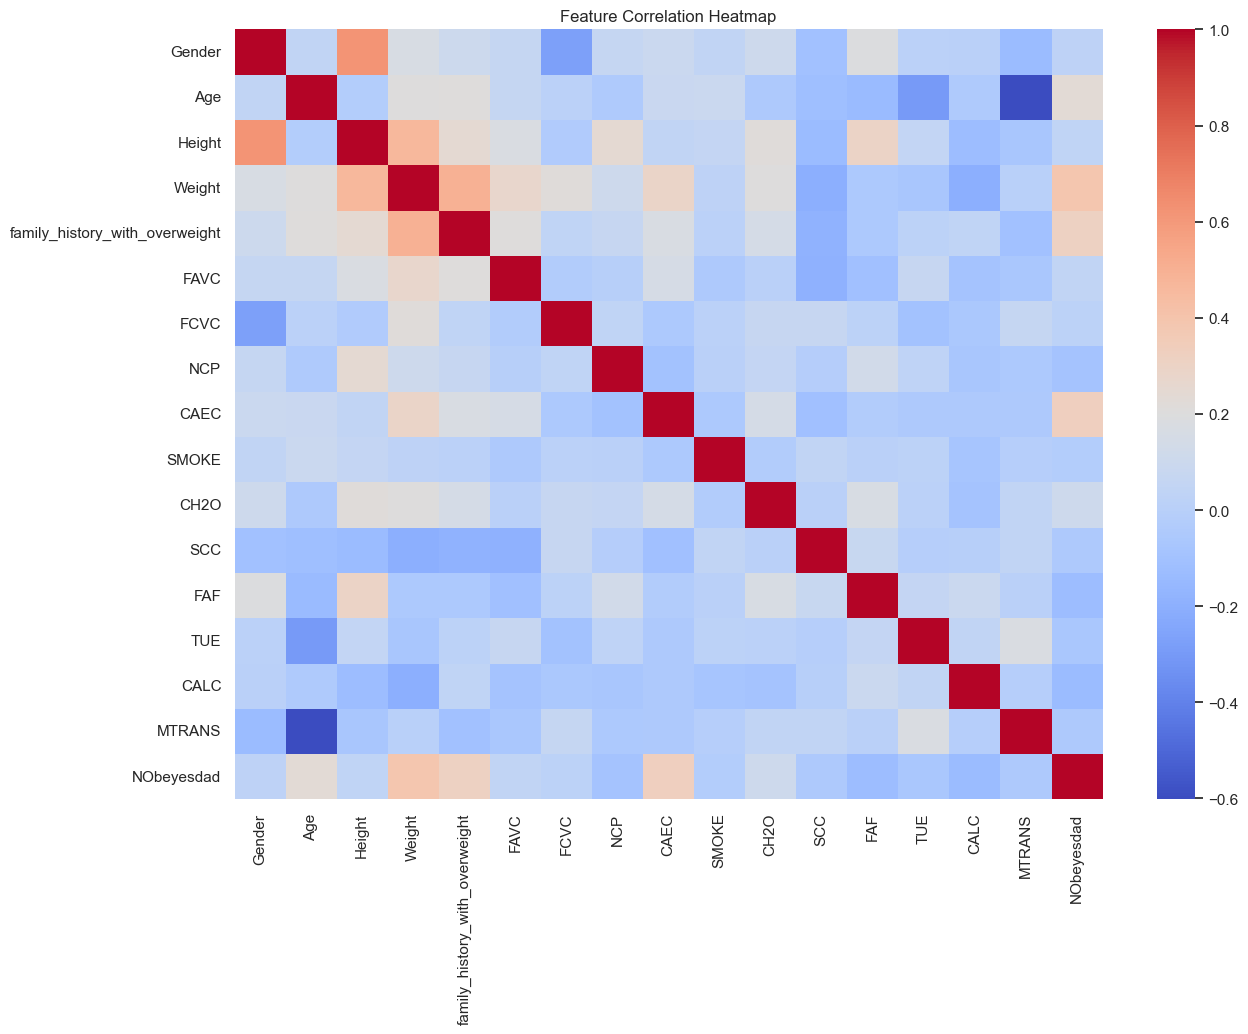

In [6]:
plt.figure(figsize=(14,10))
sns.heatmap(df.corr(), cmap="coolwarm")
plt.title("Feature Correlation Heatmap")
plt.show()


In [7]:
X = df.drop("NObeyesdad", axis=1)
y = df["NObeyesdad"]


In [8]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)


In [9]:
log_model = Pipeline([
    ("scaler", StandardScaler()),
    ("model", LogisticRegression(max_iter=1000))
])

log_model.fit(X_train, y_train)
log_preds = log_model.predict(X_test)

print("Logistic Regression Accuracy:", accuracy_score(y_test, log_preds))


Logistic Regression Accuracy: 0.8676122931442081


In [10]:
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)
dt_preds = dt_model.predict(X_test)

print("Decision Tree Accuracy:", accuracy_score(y_test, dt_preds))


Decision Tree Accuracy: 0.91725768321513


In [11]:
rf_model = RandomForestClassifier(
    n_estimators=100,
    random_state=42,
    n_jobs=-1
)

rf_model.fit(X_train, y_train)
rf_preds = rf_model.predict(X_test)

print("Random Forest Accuracy:", accuracy_score(y_test, rf_preds))


Random Forest Accuracy: 0.9527186761229315


In [12]:
knn_model = Pipeline([
    ("scaler", StandardScaler()),
    ("model", KNeighborsClassifier(n_neighbors=5))
])

knn_model.fit(X_train, y_train)
knn_preds = knn_model.predict(X_test)

print("KNN Accuracy:", accuracy_score(y_test, knn_preds))


KNN Accuracy: 0.806146572104019


c:\Users\anish\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
[WinError 2] The system cannot find the file specified
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "c:\Users\anish\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
        "wmic CPU Get NumberOfCores /Format:csv".split(),
        capture_output=True,
        text=True,
    )
  File "c:\Users\anish\anaconda3\Lib\subprocess.py", line 554, in run
    with Popen(*popenargs, **kwargs) as process:
         ~~~~~^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\anish\anaconda3\Lib\subprocess.py", line 1039, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
    ~~~~~~~~~~~~~~~~~~~^^^^^^^^^^^^^^^^^^

In [13]:
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)
nb_preds = nb_model.predict(X_test)

print("Naive Bayes Accuracy:", accuracy_score(y_test, nb_preds))


Naive Bayes Accuracy: 0.6028368794326241


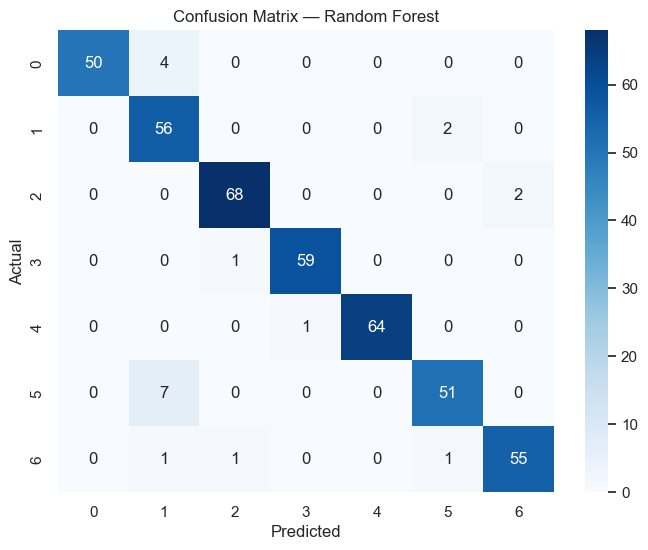

In [14]:
cm = confusion_matrix(y_test, rf_preds)

plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix — Random Forest")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


In [15]:
print(classification_report(y_test, rf_preds))


              precision    recall  f1-score   support

           0       1.00      0.93      0.96        54
           1       0.82      0.97      0.89        58
           2       0.97      0.97      0.97        70
           3       0.98      0.98      0.98        60
           4       1.00      0.98      0.99        65
           5       0.94      0.88      0.91        58
           6       0.96      0.95      0.96        58

    accuracy                           0.95       423
   macro avg       0.96      0.95      0.95       423
weighted avg       0.96      0.95      0.95       423



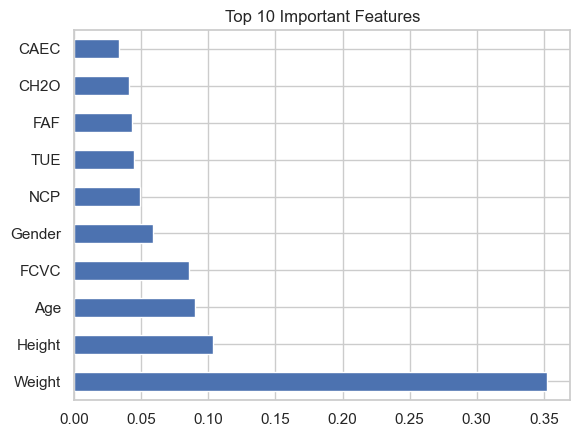

In [16]:
importances = pd.Series(
    rf_model.feature_importances_,
    index=X.columns
).sort_values(ascending=False)

importances.head(10).plot(kind="barh")
plt.title("Top 10 Important Features")
plt.show()


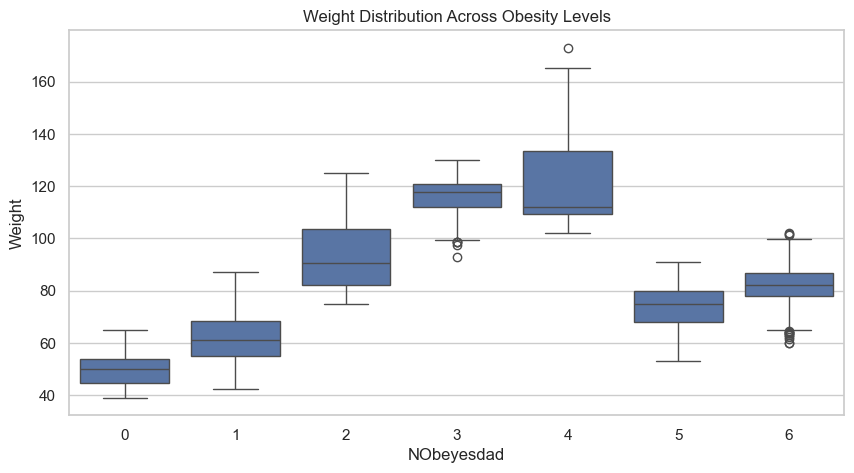

In [17]:
plt.figure(figsize=(10,5))
sns.boxplot(x=y, y=df["Weight"])
plt.title("Weight Distribution Across Obesity Levels")
plt.show()


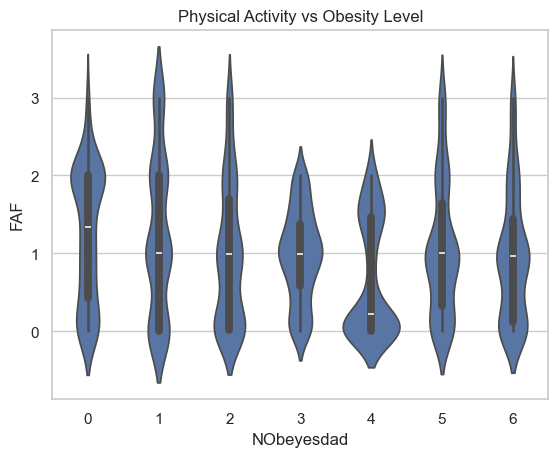

In [18]:
sns.violinplot(x=y, y=df["FAF"])
plt.title("Physical Activity vs Obesity Level")
plt.show()


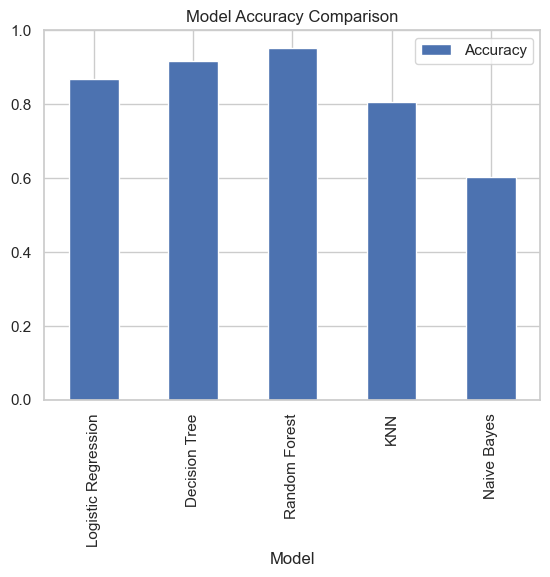

In [19]:
results = pd.DataFrame({
    "Model": [
        "Logistic Regression",
        "Decision Tree",
        "Random Forest",
        "KNN",
        "Naive Bayes"
    ],
    "Accuracy": [
        accuracy_score(y_test, log_preds),
        accuracy_score(y_test, dt_preds),
        accuracy_score(y_test, rf_preds),
        accuracy_score(y_test, knn_preds),
        accuracy_score(y_test, nb_preds)
    ]
})

results.set_index("Model").plot(kind="bar")
plt.title("Model Accuracy Comparison")
plt.ylim(0,1)
plt.show()
